## Analysis of American Football betting and Superbowl Winners
##### Collaborators: Nicole Tran, Azwa Bajwah, and Evelyn Zhao

Directions: In general, the tutorial should contain at least 1500 words of prose (excluding the comments) and 150 lines of (nonpadded, legitimate) Python code, along with appropriate documentation, visualization, and links to any external information that might help the reader. 

Grading
1. Motivation. Does the tutorial make the reader believe the topic is relevant or important (i) in
general and (ii) with respect to data science?
2. Understanding. After reading through the tutorial, does an uninformed reader feel informed about
the topic? Would a reader who already knew about the topic feel like s/he learned more about it?
3. Other resources. Does the tutorial link out to other resources (on the web, in books, etc) that
would give a lagging reader additional help on specific topics, or an advanced reader the ability to
dive more deeply into a specific application area or technique?
4. Prose. Does the prose portion of the tutorial actually add to the content of the deliverable?
5. Code. Is the code well written, well documented, reproducible, and does it help the reader understand
the tutorial? Does it give good examples of specific techniques?
6. Subjective evaluation. If somebody linked to this tutorial from, say, Hacker News, would people
actually read through the entire thing

### Introduction

The main purpose of this project is to...

Why is this important?...

Over this tutorial, we will be going through the following:
1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Modeling: Analysis, Hypothesis Testing, & Machine Learning
5. Interpretation: Insight & Next Steps

### Data Collection

At this stage, we must find an appropirate dataset relevant to the NFL and Superbowl winners.

talk about using kaggle

---

During this project, we will be using Python language, and we use tools such as Jupiter Notebook to develop this project. If you haven't heard about Jupiter notebooks before, make sure to learn more about them [here](https://jupyter.org/).

First, we start by importing libraries used for data collection and analysis.

#### Imports

In [90]:
import sqlite3 as sql
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from plotnine import *

You will see how each of these imports will help collect, analyze, and display data as you complete this tutorial.

### Data Processing

You can see from the csv files that they are completely unreadable. Now that we have our imports, let's extract the csv file into [pandas dataframes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [91]:
stadium_data = pd.read_csv('nfl_stadiums.csv', encoding='ISO-8859-1')
team_data = pd.read_csv('nfl_teams.csv', encoding='ISO-8859-1')
scores_data = pd.read_csv('spreadspoke_scores.csv', encoding='ISO-8859-1')

In [92]:
# not really useful
# stadium_data.head(10)

In [93]:
# also not that useful
team_data.head(10)

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [94]:
scores_data.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
5,9/10/1966,1966,2,False,Houston Oilers,31,0,Oakland Raiders,NaN,NaN,NaN,Rice Stadium,False,77.0,6.0,82.0,NaN
6,9/10/1966,1966,2,False,San Diego Chargers,24,0,New England Patriots,NaN,NaN,NaN,Balboa Stadium,False,69.0,9.0,81.0,NaN
7,9/11/1966,1966,1,False,Atlanta Falcons,14,19,Los Angeles Rams,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,71.0,7.0,57.0,NaN
8,9/11/1966,1966,2,False,Buffalo Bills,20,42,Kansas City Chiefs,NaN,NaN,NaN,War Memorial Stadium,False,63.0,11.0,73.0,NaN
9,9/11/1966,1966,1,False,Detroit Lions,14,3,Chicago Bears,NaN,NaN,NaN,Tiger Stadium,False,67.0,7.0,73.0,NaN


### List of SuperBowl Winners:
https://www.espn.com/nfl/superbowl/history/winners

In [95]:
# remove columns that we will not be using
# (ev) do we want to do weather analysis? 
# (ev) i don't think it will be as informative as analyzing betting patterns - but, if we wanted to 
# see what kind of weather the superbowl winners play best in, ig we can use it
scores_data = scores_data.drop(['schedule_date', 'schedule_playoff', 'stadium_neutral', 'stadium', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail'], axis=1)
scores_data

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line
0,1966,1,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN
1,1966,1,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN
2,1966,1,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN
3,1966,2,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN
4,1966,1,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13796,2023,Division,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46
13797,2023,Division,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5
13798,2023,Conference,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44
13799,2023,Conference,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5


### Explaining some columns:

#### spread_favorite
In football betting, the term "spread favorite" refers to the team that is expected to win by a certain number of points as set by the betting odds. This team is typically considered stronger or in a better position to win the game, and the "spread" is the number of points bookmakers estimate by which the favorite is expected to outscore the underdog.

Example of a Point Spread Bet:
Suppose in an NFL game, the Green Bay Packers are playing against the Detroit Lions. If the Packers are listed as the "spread favorite," the listing might look something like this:

- Green Bay Packers -7.5
- Detroit Lions +7.5

This means that the Packers are favored to win by more than 7.5 points. For a bet on the Packers to pay out, they must win by 8 points or more. Conversely, a bet on the Lions would win if the Lions lose by 7 points or fewer, or if they win the game outright.

#### over_under_line
In football betting, the "over/under" line, also known as the total, is a wager on the combined score of both teams in a game. This betting line sets a predicted total score by the oddsmakers, and bettors can wager whether the actual combined score of the game will be over or under that set number.

Example of an Over/Under Bet:
Suppose in an NFL game between the New England Patriots and the Miami Dolphins, the over/under line is set at 47.5 points. Here are the betting options:

- Over 47.5 Points: If you bet the over, you are predicting that the combined score of both teams will be 48 points or more.
- Under 47.5 Points: If you bet the under, you are predicting that the combined score will be 47 points or fewer.

If the final combined score is 48 points or more, the over bets win. If it is 47 points or fewer, the under bets win.

#### schedule_week
In this data set, the schedule week is usually a number. However, superbowl games are labeled as "Superbowl" in the schedule_week column.

In [96]:
# let's replace team_favorite_id to just team_favorite

# make a mapping dictionary. this will be a map that points the team id to the  team name
mapping = team_data.set_index('team_id_pfr')['team_name'].to_dict()

# create a column called team_favorite
scores_data['team_favorite'] = scores_data['team_favorite_id'].map(mapping)

# drop the old team_favorite_id
scores_data.drop(columns='team_favorite_id', inplace=True)

scores_data

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,team_favorite
0,1966,1,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN
1,1966,1,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN
2,1966,1,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN
3,1966,2,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN
4,1966,1,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13796,2023,Division,Buffalo Bills,24,27,Kansas City Chiefs,-2.5,46,Buffalo Bills
13797,2023,Division,Detroit Lions,31,23,Tampa Bay Buccaneers,-6.0,49.5,Detroit Lions
13798,2023,Conference,Baltimore Ravens,10,17,Kansas City Chiefs,-4.5,44,NaN
13799,2023,Conference,San Francisco 49ers,34,31,Detroit Lions,-7.5,53.5,NaN


In [97]:
# make a column called winning_team that shows who won the game

# compare the score_home and score_away
def determine_winner(row):
    if row['score_home'] > row['score_away']:
        return row['team_home']
    else:
        return row['team_away']

scores_data['winning_team'] = scores_data.apply(determine_winner, axis=1)

scores_data

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,team_favorite,winning_team
0,1966,1,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Oakland Raiders
1,1966,1,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Houston Oilers
2,1966,1,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,San Diego Chargers
3,1966,2,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,New York Jets
4,1966,1,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Green Bay Packers
...,...,...,...,...,...,...,...,...,...,...
13796,2023,Division,Buffalo Bills,24,27,Kansas City Chiefs,-2.5,46,Buffalo Bills,Kansas City Chiefs
13797,2023,Division,Detroit Lions,31,23,Tampa Bay Buccaneers,-6.0,49.5,Detroit Lions,Detroit Lions
13798,2023,Conference,Baltimore Ravens,10,17,Kansas City Chiefs,-4.5,44,NaN,Kansas City Chiefs
13799,2023,Conference,San Francisco 49ers,34,31,Detroit Lions,-7.5,53.5,NaN,San Francisco 49ers


In [98]:
# make separate dataframe to see spread betting
betting_df = scores_data

# replace empty space with NaN
betting_df['over_under_line'] = betting_df['over_under_line'].replace(' ', np.nan)
# Convert 'over_under_line' to float
betting_df['over_under_line'] = betting_df['over_under_line'].astype(float)
# remove all games that have NaN
betting_df = betting_df.dropna(subset=['spread_favorite', 'over_under_line', 'team_favorite'])
# remove all games that have "PICK" as team_favorite, which means that it is an equal matchup
betting_df = betting_df[betting_df['team_favorite'] != 'PICK']

# find out which team bet would have won
def determine_spread_winner(row):
    if row['team_favorite'] != row['winning_team']:
        return row['winning_team']
    else:
        point_diff = row['score_home'] - row['score_away']
        if abs(point_diff) > abs(row['spread_favorite']):
            return row['team_favorite']
        else:
            if row['team_favorite'] == row['team_home']:
                return row['team_away']
            else:
                return row['team_home']
            
# make a column to determine which bet would have won
betting_df['spread_bet_winner'] = betting_df.apply(determine_spread_winner, axis=1)

# find out over or under
def determine_over_under(row):
    total_score = row['score_home'] + row['score_away']
    if total_score > row['over_under_line']:
        return 'Over'
    elif total_score < row['over_under_line']:
        return 'Under'
    else:
        return 'Push'  # Optionally handle the exact match case

# make a column to determine if betting over or under won
betting_df['over_under_winner'] = betting_df.apply(determine_over_under, axis=1)

betting_df

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,team_favorite,winning_team,spread_bet_winner,over_under_winner
727,1969,Superbowl,Kansas City Chiefs,23,7,Minnesota Vikings,-12.0,39.0,Minnesota Vikings,Kansas City Chiefs,Kansas City Chiefs,Under
1105,1971,Superbowl,Dallas Cowboys,24,3,Miami Dolphins,-6.0,34.0,Dallas Cowboys,Dallas Cowboys,Dallas Cowboys,Under
1294,1972,Superbowl,Miami Dolphins,14,7,Washington Redskins,-1.0,33.0,Miami Dolphins,Miami Dolphins,Miami Dolphins,Under
1483,1973,Superbowl,Miami Dolphins,24,7,Minnesota Vikings,-6.5,33.0,Miami Dolphins,Miami Dolphins,Miami Dolphins,Under
1672,1974,Superbowl,Minnesota Vikings,6,16,Pittsburgh Steelers,-3.0,33.0,Pittsburgh Steelers,Pittsburgh Steelers,Pittsburgh Steelers,Under
...,...,...,...,...,...,...,...,...,...,...,...,...
13791,2023,Wildcard,Detroit Lions,24,23,Los Angeles Rams,-3.0,53.0,Detroit Lions,Detroit Lions,Los Angeles Rams,Under
13792,2023,Wildcard,Buffalo Bills,31,17,Pittsburgh Steelers,-9.0,33.0,Buffalo Bills,Buffalo Bills,Buffalo Bills,Over
13793,2023,Wildcard,Tampa Bay Buccaneers,32,9,Philadelphia Eagles,-3.0,43.0,Philadelphia Eagles,Tampa Bay Buccaneers,Tampa Bay Buccaneers,Under
13796,2023,Division,Buffalo Bills,24,27,Kansas City Chiefs,-2.5,46.0,Buffalo Bills,Kansas City Chiefs,Kansas City Chiefs,Over


In [99]:
# finding just the superbowl games
superbowl_games = scores_data.loc[scores_data['schedule_week'] == 'Superbowl']
superbowl_games.head(10)

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,team_favorite,winning_team
170,1966,Superbowl,Green Bay Packers,35,10,Kansas City Chiefs,-14.0,NaN,NaN,Green Bay Packers
350,1967,Superbowl,Green Bay Packers,33,14,Oakland Raiders,-13.5,43.0,NaN,Green Bay Packers
538,1968,Superbowl,Baltimore Colts,7,16,New York Jets,-18.0,40.0,NaN,New York Jets
727,1969,Superbowl,Kansas City Chiefs,23,7,Minnesota Vikings,-12.0,39.0,Minnesota Vikings,Kansas City Chiefs
916,1970,Superbowl,Baltimore Colts,16,13,Dallas Cowboys,-2.5,36.0,NaN,Baltimore Colts
1105,1971,Superbowl,Dallas Cowboys,24,3,Miami Dolphins,-6.0,34.0,Dallas Cowboys,Dallas Cowboys
1294,1972,Superbowl,Miami Dolphins,14,7,Washington Redskins,-1.0,33.0,Miami Dolphins,Miami Dolphins
1483,1973,Superbowl,Miami Dolphins,24,7,Minnesota Vikings,-6.5,33.0,Miami Dolphins,Miami Dolphins
1672,1974,Superbowl,Minnesota Vikings,6,16,Pittsburgh Steelers,-3.0,33.0,Pittsburgh Steelers,Pittsburgh Steelers
1861,1975,Superbowl,Dallas Cowboys,17,21,Pittsburgh Steelers,-7.0,36.0,Pittsburgh Steelers,Pittsburgh Steelers


### Exploratory Analysis and Data Visualization

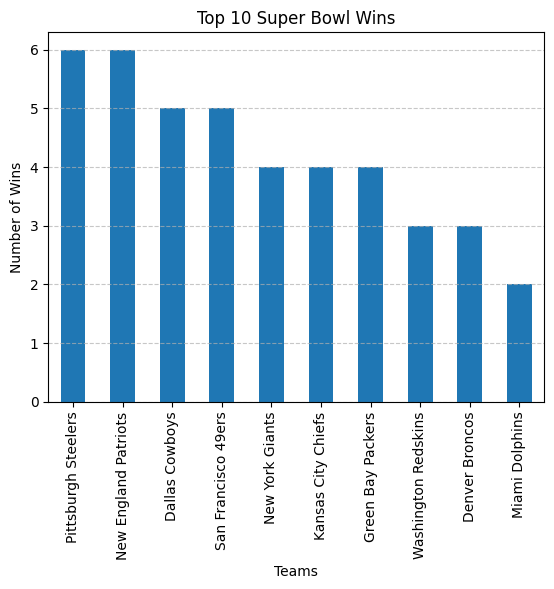

In [100]:
# finding & plotting top 5 teams according to number of superbowl wins
# Count the wins for each team and grab the top 10
top_teams = superbowl_games['winning_team'].value_counts().head(10)

# Plotting the wins
top_teams.plot(kind='bar')
plt.title('Top 10 Super Bowl Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()